In [2]:
import cs109style
cs109style.customize_mpl()
cs109style.customize_css()

# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

from collections import defaultdict

import pandas as pd
import matplotlib.pyplot as plt
import requests
from pattern import web



Setting custom matplotlib visual style
Setting custom CSS for the IPython Notebook


C:\Users\rlochavillo\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Fetching population data from Wikipedia

In this example we will fetch data about countries and their population from Wikipedia.

http://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population has several tables for individual countries, subcontinents as well as different years. We will combine the data for all countries and all years in a single panda dataframe and visualize the change in population for different countries.

###We will go through the following steps:
* fetching html with embedded data
* parsing html to extract the data
* collecting the data in a panda dataframe
* displaying the data

To give you some starting points for your homework, we will also show the different sub-steps that can be taken to reach the presented solution.

## Fetching the Wikipedia site

In [10]:
url = 'http://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population'
website_html = requests.get(url).text
print website_html

<!DOCTYPE html>
<html lang="en" dir="ltr" class="client-nojs">
<head>
<meta charset="UTF-8" />
<title>List of countries by past and future population - Wikipedia, the free encyclopedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ = window.RLQ || []).push(function () {
mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_past_and_future_population","wgTitle":"List of countries by past and future population","wgCurRevisionId":710401724,"wgRevisionId":710401724,"wgArticleId":20928488,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Lists of countries by population"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefa

## Parsing html data

In [11]:
def get_population_html_tables(html):
    """Parse html and return html tables of wikipedia population data."""

    dom = web.Element(html)

    # 0. step: look at html source!
    
    # 1. step: get all tables
    
    # tbls = [t for t in dom.by_tag('table')]

    # 2. step: get all wikitable sortable tables (the ones with data)
    
    tbls = [t for t in dom.by_tag('table') if t.attributes['class'] == "sortable wikitable"]
    
    return tbls

tables = get_population_html_tables(website_html)
print "table length: %d" %len(tables)
for t in tables:
    print t.attributes


table length: 3
{u'style': u'text-align: right', u'class': u'sortable wikitable'}
{u'style': u'text-align: right', u'class': u'sortable wikitable'}
{u'style': u'text-align: right', u'class': u'sortable wikitable'}


In [12]:
def table_type(tbl):
    headers = [th.content for th in tbl.by_tag('th')]
    return headers[1]

# group the tables by type
tables_by_type = defaultdict(list)  # defaultdicts have a default value that is inserted when a new key is accessed
for tbl in tables:
    tables_by_type[table_type(tbl)].append(tbl)

print tables_by_type

defaultdict(<type 'list'>, {u'Country (or dependent territory)': [Element(tag=u'table'), Element(tag=u'table'), Element(tag=u'table')]})


## Extracting data and filling it into a dictionary

In [15]:
def get_countries_population(tables):
    """Extract population data for countries from all tables and store it in dictionary."""
    
    result = defaultdict(dict)

    # 1. step: try to extract data for a single table

    # 2. step: iterate over all tables, extract headings and actual data and combine data into single dict
    
    for tbl in tables:
        # extract column headers    
        # each table looks a little different, therefore extract columns that store data (i.e., table header is a year)
        tbl_headers = [ th.content for th in tbl.by_tag('th')]
        column_idx_years = [(idx, int(header)) for idx, header in enumerate(tbl_headers) if header.isnumeric()]
        column_idx, column_years = zip(*column_idx_years)
        
        # extract data from table
    
        # get table rows - but skip the ones that have no td element
        tbl_rows = [ row for row in tbl.by_tag('tr') if row.by_tag('td') ]
        #print len(trs)
        #print trs[0]
    
        for row in tbl_rows:
    
            #datarow = [td.content for td in tr.by_tag('td')]
            #print datarow
        
            # get country name - 2nd td, a href, convert unicode to string
            countryname = (row.by_tag('td')[1].by_tag('a')[0].content).encode('ascii','ignore') 
            #print type(countryname)
            #print countryname
        
            # get country data - create a dictionary {1955: 10000, 1960: 14000,...}
            # extract data from the columns in column_idx; strip commas from numers; scale number to millions
            countrydata = {column_years[i]:int(row.by_tag('td')[idx].content.replace(',', ''))/1000.0 for i,idx in enumerate(column_idx) }
            #print datarow
            
            # append to dictionary
            result[countryname].update(countrydata)
    
    return result


result = get_countries_population(tables_by_type['Country (or dependent territory)'])
print result

ValueError: invalid literal for int() with base 10: '<b>2557629</b>'

## Creating a dataframe from a dictionary

In [8]:
# create dataframe

df = pd.DataFrame.from_dict(result, orient='index')
# sort based on year
df.sort(axis=1,inplace=True)
print df


<class 'pandas.core.frame.DataFrame'>
Index: 227 entries, Afghanistan to Zimbabwe
Data columns (total 21 columns):
1950    227  non-null values
1955    227  non-null values
1960    227  non-null values
1965    227  non-null values
1970    227  non-null values
1975    227  non-null values
1980    227  non-null values
1985    227  non-null values
1990    227  non-null values
1995    227  non-null values
2000    227  non-null values
2005    227  non-null values
2010    227  non-null values
2015    227  non-null values
2020    227  non-null values
2025    227  non-null values
2030    227  non-null values
2035    227  non-null values
2040    227  non-null values
2045    227  non-null values
2050    227  non-null values
dtypes: float64(21)


## Some data accessing functions for a panda dataframe

In [9]:
subtable = df.iloc[0:2, 0:2]
print "subtable"
print subtable
print ""

column = df[1955]
print "column"
print column
print ""

row = df.ix[0] #row 0
print "row"
print row
print ""

rows = df.ix[:2] #rows 0,1
print "rows"
print rows
print ""

element = df.ix[0,1955] #element
print "element"
print element
print ""

# max along column
print "max"
print df[1950].max()
print ""

# axes
print "axes"
print df.axes
print ""

row = df.ix[0]
print "row info"
print row.name
print row.index
print ""

countries =  df.index
print "countries"
print countries
print ""

print "Austria"
print df.ix['Austria']

subtable
              1950   1955
Afghanistan  8.150  8.891
Albania      1.227  1.392

column
Afghanistan             8.891
Albania                 1.392
Algeria                 9.842
American Samoa          0.020
Andorra                 0.006
Angola                  4.423
Anguilla                0.005
Antigua and Barbuda     0.051
Argentina              18.928
Armenia                 1.565
Aruba                   0.054
Australia               9.277
Austria                 6.947
Azerbaijan              3.314
Bahamas                 0.087
...
United Arab Emirates              0.083
United Kingdom                   50.946
United States                   165.069
United States Virgin Islands      0.028
Uruguay                           2.353
Uzbekistan                        7.232
Vanuatu                           0.059
Venezuela                         6.170
Vietnam                          27.738
Wallis and Futuna                 0.007
West Bank                         0.788
Western Sah

## Plotting population of 4 countries

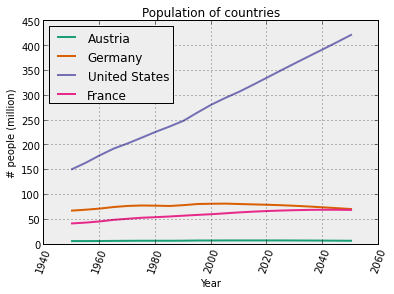

In [10]:
plotCountries = ['Austria', 'Germany', 'United States', 'France']
    
for country in plotCountries:
    row = df.ix[country]
    plt.plot(row.index, row, label=row.name ) 
    
plt.ylim(ymin=0) # start y axis at 0

plt.xticks(rotation=70)
plt.legend(loc='best')
plt.xlabel("Year")
plt.ylabel("# people (million)")
plt.title("Population of countries")

## Plot 5 most populous countries from 2010 and 2060

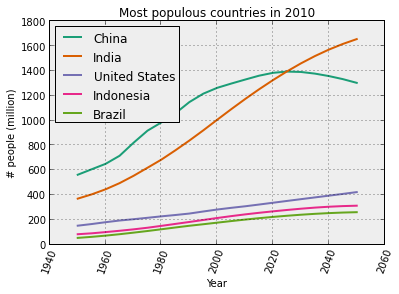

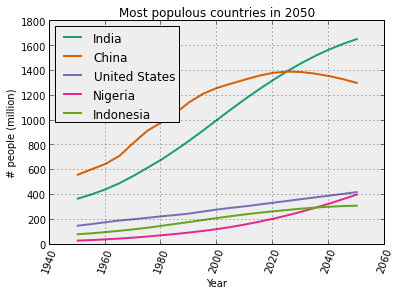

In [11]:
def plot_populous(df, year):
    # sort table depending on data value in year column
    df_by_year = df.sort(year, ascending=False)
    
    plt.figure()
    for i in range(5):  
        row = df_by_year.ix[i]
        plt.plot(row.index, row, label=row.name ) 
            
    plt.ylim(ymin=0)
    
    plt.xticks(rotation=70)
    plt.legend(loc='best')
    plt.xlabel("Year")
    plt.ylabel("# people (million)")
    plt.title("Most populous countries in %d" % year)

plot_populous(df, 2010)
plot_populous(df, 2050)